# Capstone Section 7: Generalisation Score / Model Comparison
<br>

## Task
<br>

1) In the previous section, the below models performed the best in descending recall scores on test data. However, it has yet to satisfy generalisation. [Generalisation Score](#Section-1:Generalisation-Score)
<br>
<br>
- 1 - LGBM on Standard Scaler Data (0.9627)
- 2 - LGBM on Min Max Scaler Data (0.9612)
- 3 - Random Forest on Standard Scaler Data (0.9006)
- 4 - Random Forest on Min Max Scaler Data (0.8898)
- 5 - Logistic Regression on Min Max Scaler Data (0.8866)
- 6 - Stacking on Standard Scaler Data (0.7640)
- 7 - Logistic Regression on Standard Scaler Data (0.7609)
- 8 - Stacking on Min Max Scaler Data (0.7065)
<br>
<br>

2) Section 2 will compare model comparision. Models used for standard scaler data will be compared against each other. Similarly for min max scaler data. [Model Comparision](#Section-2:Model-Comparision)

## Importing Libraries

In [93]:
#!pip install shap
import joblib, pandas as pd, numpy as np, matplotlib.pyplot as plt, shap
from sklearn.metrics import recall_score, roc_curve, roc_auc_score, precision_recall_curve, auc

## Define Generalisation Formula

In [94]:
def generalisation_score(x,y):
    return (abs(x-y) / x) * 100

## Reading Data Files

In [95]:
# Standard Scaler Data
X_train_ss = pd.read_pickle('./Data/Standard Scaler/X_train_ss.pkl')
X_test_ss = pd.read_pickle('./Data/Standard Scaler/X_test_ss.pkl')

# Min Max Scaler Data
X_train_mms = pd.read_pickle('./Data/Min Max Scaler/X_train_mms.pkl')
X_test_mms = pd.read_pickle('./Data/Min Max Scaler/X_test_mms.pkl')

# Target Label
y_train = pd.read_pickle('./Data/y_train.pkl')
y_test = pd.read_pickle('./Data/y_test.pkl')

## Reading Machine Learning Model Files

#### Logistic Regression

In [96]:
gs_ss_lg = joblib.load('./Data/Machine Learning Model/Logistic Regression/gs_ss_lg.pkl')
gs_mms_lg = joblib.load('./Data/Machine Learning Model/Logistic Regression/gs_mms_lg.pkl')

#### Light Gradient Boosting Machine

In [97]:
gs_ss_lgbm = joblib.load(\
              './Data/Machine Learning Model/Light Gradient Boosting Machine\gs_ss_lgbm.pkl')
gs_mms_lgbm = joblib.load(\
              './Data/Machine Learning Model/Light Gradient Boosting Machine\gs_mms_lgbm.pkl')

#### Random Forest

In [98]:
gs_ss_rfc = joblib.load('./Data/Machine Learning Model/Random Forest/gs_ss_rfc.pkl')
gs_mms_rfc = joblib.load('./Data/Machine Learning Model/Random Forest/gs_mms_rfc.pkl')

#### Stacking

In [99]:
stacking_ss = joblib.load('./Data/Machine Learning Model/Stacking/Standard Scaler/stacking_ss.pkl')
stacking_mms = joblib.load('./Data/Machine Learning Model/Stacking/Min Max Scaler/stacking_mms.pkl')

# Section 1:Generalisation Score

## Standard Scaler Data

#### Logistic Regression

In [100]:
y_test_ss_lg_pred = gs_ss_lg.predict(X_test_ss)
y_train_ss_lg_pred = gs_ss_lg.predict(X_train_ss)

recall_score(y_test, y_test_ss_lg_pred)
recall_score(y_train, y_train_ss_lg_pred)

generalisation_score( recall_score(y_test, y_test_ss_lg_pred) , 
                      recall_score(y_train, y_train_ss_lg_pred))

0.16941086894450458

#### Light Gradient Boosting Machine

In [101]:
y_test_ss_lgbm_pred = gs_ss_lgbm.predict(X_test_ss)
y_train_ss_lgbm_pred = gs_ss_lgbm.predict(X_train_ss)

recall_score(y_test, y_test_ss_lgbm_pred)
recall_score(y_train, y_train_ss_lgbm_pred)

generalisation_score( recall_score(y_train, y_train_ss_lgbm_pred) , 
                      recall_score(y_test, y_test_ss_lgbm_pred))

1.9632217231178861

#### Random Forest

In [102]:
y_test_ss_rfc_pred = gs_ss_rfc.predict(X_test_ss)
y_train_ss_rfc_pred = gs_ss_rfc.predict(X_train_ss)

recall_score(y_test, y_test_ss_rfc_pred)
recall_score(y_train, y_train_ss_rfc_pred)

generalisation_score( recall_score(y_train, y_train_ss_rfc_pred) , 
                      recall_score(y_test, y_test_ss_rfc_pred))

9.21206862749187

#### Stacking

In [103]:
y_test_ss_stacking_pred = stacking_ss.predict(X_test_ss)
y_train_ss_stacking_pred = stacking_ss.predict(X_train_ss)

recall_score(y_test, y_test_ss_stacking_pred)
recall_score(y_train, y_train_ss_stacking_pred)

generalisation_score( recall_score(y_train, y_train_ss_stacking_pred) , 
                      recall_score(y_test, y_test_ss_stacking_pred))

7.91888435750329

## Min Max Scaler Data

#### Logistic Regression

In [104]:
y_test_mms_lg_pred = gs_mms_lg.predict(X_test_mms)
y_train_mms_lg_pred = gs_mms_lg.predict(X_train_mms)

recall_score(y_test, y_test_mms_lg_pred)
recall_score(y_train, y_train_mms_lg_pred)

generalisation_score( recall_score(y_test, y_test_mms_lg_pred) , 
                      recall_score(y_train, y_train_mms_lg_pred) )

0.890824680802415

#### Light Gradient Boosting Machine

In [105]:
y_test_mms_lgbm_pred = gs_mms_lgbm.predict(X_test_mms)
y_train_mms_lgbm_pred = gs_mms_lgbm.predict(X_train_mms)

recall_score(y_test, y_test_mms_lgbm_pred)
recall_score(y_train, y_train_mms_lg_pred)

generalisation_score( recall_score(y_train, y_train_mms_lgbm_pred) , 
                      recall_score(y_test, y_test_mms_lgbm_pred) )

1.6543035814841696

#### Random Forest

In [106]:
y_test_mms_rfc_pred = gs_mms_rfc.predict(X_test_mms)
y_train_mms_rfc_pred = gs_mms_rfc.predict(X_train_mms)

recall_score(y_test, y_test_mms_rfc_pred)
recall_score(y_train, y_train_mms_rfc_pred)

generalisation_score( recall_score(y_train, y_train_mms_rfc_pred) , 
                      recall_score(y_test, y_test_mms_rfc_pred) )

10.307785040608353

#### Stacking

In [107]:
y_test_mms_stacking_pred = stacking_mms.predict(X_test_mms)
y_train_mms_stacking_pred = stacking_mms.predict(X_train_mms)

recall_score(y_test, y_test_mms_stacking_pred)
recall_score(y_train, y_train_mms_stacking_pred)

generalisation_score( recall_score(y_train, y_train_mms_stacking_pred) , 
                      recall_score(y_test, y_test_mms_stacking_pred) )

2.0785659801678014

# Section 2:Model Comparision

## ROC Curve

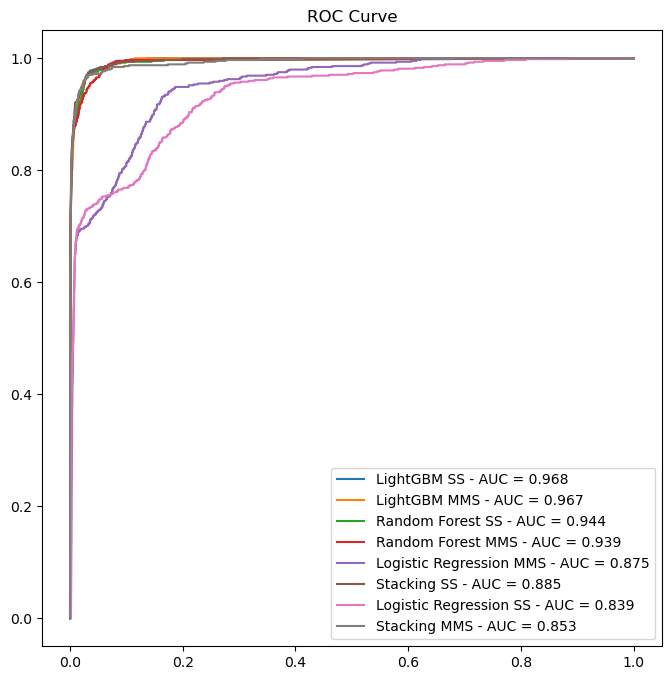

In [108]:
# Generating a prediction for LGBM on SS
ss_lgbm_proba = gs_ss_lgbm.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LGBM on MMS
mms_lgbm_proba = gs_mms_lgbm.predict_proba(X_test_mms)[:,1]
# Generating a prediction for RF on SS
ss_rf_proba = gs_ss_rfc.predict_proba(X_test_ss)[:,1]
# Generating a prediction for RF on MMS
mms_rf_proba = gs_mms_rfc.predict_proba(X_test_mms)[:,1]
# Generating a prediction for LG on MMS
mms_lg_proba = gs_mms_lg.predict_proba(X_test_mms)[:,1]
# Generating a prediction for stacking on SS
stacking_ss_proba = stacking_ss.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LG on SS
ss_lg_proba = gs_ss_lg.predict_proba(X_test_ss)[:,1]
# Generating a prediction for stacking on MMS
stacking_mms_proba = stacking_mms.predict_proba(X_test_mms)[:,1]

#-------------------------------------------------------------------------------------------------------

# Calculating scores for LGBM on SS
ss_lgbm_fpr, ss_lgbm_tpr, threshold = roc_curve(y_test, ss_lgbm_proba)
# Calculating scores for LGBM on MMS
mms_lgbm_fpr, mms_lgbm_tpr, threshold = roc_curve(y_test, mms_lgbm_proba)
# Calculating scores for RF on SS
ss_rf_fpr, ss_rf_tpr, threshold = roc_curve(y_test, ss_rf_proba)
# Calculating scores for RF on MMS
mms_rf_fpr, mms_rf_tpr, threshold = roc_curve(y_test, mms_rf_proba)
# Calculating scores for LG on MMS
mms_lg_fpr, mms_lg_tpr, threshold = roc_curve(y_test, mms_lg_proba)
# Calculating scores for stacking on SS
ss_stacking_fpr, ss_stacking_tpr, threshold = roc_curve(y_test, stacking_ss_proba)
# Calculating scores for LG on SS
ss_lg_fpr, ss_lg_tpr, threshold = roc_curve(y_test, ss_lg_proba)
# Calculating scores for stacking on MMS
mms_stacking_fpr, mms_stacking_tpr, threshold = roc_curve(y_test, stacking_mms_proba)

#-------------------------------------------------------------------------------------------------------

# Setting plot size
plt.figure(figsize=(8, 8), dpi=100)

#-------------------------------------------------------------------------------------------------------

# Plotting LGBM on SS
plt.plot(ss_lgbm_fpr, ss_lgbm_tpr, 
         label = f"LightGBM SS - AUC = {round(roc_auc_score(y_test, y_test_ss_lgbm_pred),3)}")
# Plotting LGBM on MMS
plt.plot(mms_lgbm_fpr, mms_lgbm_tpr, 
        label = f"LightGBM MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_lgbm_pred),3)}")
# Plotting RF on SS
plt.plot(ss_rf_fpr, ss_rf_tpr, 
        label = f"Random Forest SS - AUC = {round(roc_auc_score(y_test, y_test_ss_rfc_pred),3)}")
# Plotting RF on MMS
plt.plot(mms_rf_fpr, mms_rf_tpr, 
        label = f"Random Forest MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_rfc_pred),3)}")
# Plotting LG on MMS
plt.plot(mms_lg_fpr, mms_lg_tpr,
        label = f"Logistic Regression MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_lg_pred),3)}")
# Plotting Stacking on SS
plt.plot(ss_stacking_fpr, ss_stacking_tpr,
        label = f"Stacking SS - AUC = {round(roc_auc_score(y_test, y_test_ss_stacking_pred),3)}")
# Plotting LG on SS
plt.plot(ss_lg_fpr, ss_lg_tpr,
        label = f"Logistic Regression SS - AUC = {round(roc_auc_score(y_test, y_test_ss_lg_pred),3)}")
# Plotting Stacking on MMS
plt.plot(mms_stacking_fpr, mms_stacking_tpr,
        label = f"Stacking MMS - AUC = {round(roc_auc_score(y_test, y_test_mms_stacking_pred),3)}")

#-------------------------------------------------------------------------------------------------------

# Display legend/Title
plt.legend()
plt.title('ROC Curve')

#-------------------------------------------------------------------------------------------------------

# Show plot
plt.show();

## Precision-Recall Curve

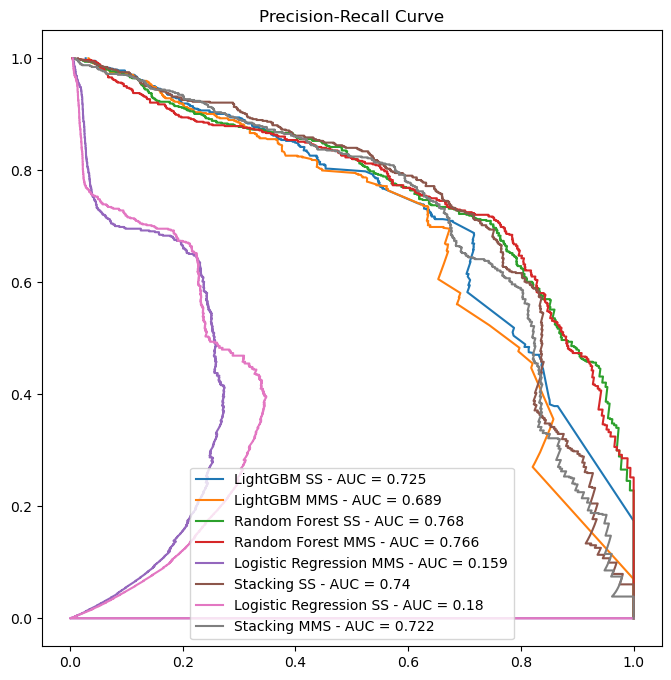

In [109]:
# Generating a prediction for LGBM on SS
ss_lgbm_proba = gs_ss_lgbm.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LGBM on MMS
mms_lgbm_proba = gs_mms_lgbm.predict_proba(X_test_mms)[:,1]
# Generating a prediction for RF on SS
ss_rf_proba = gs_ss_rfc.predict_proba(X_test_ss)[:,1]
# Generating a prediction for RF on MMS
mms_rf_proba = gs_mms_rfc.predict_proba(X_test_mms)[:,1]
# Generating a prediction for LG on MMS
mms_lg_proba = gs_mms_lg.predict_proba(X_test_mms)[:,1]
# Generating a prediction for stacking on SS
stacking_ss_proba = stacking_ss.predict_proba(X_test_ss)[:,1]
# Generating a prediction for LG on SS
ss_lg_proba = gs_ss_lg.predict_proba(X_test_ss)[:,1]
# Generating a prediction for stacking on MMS
stacking_mms_proba = stacking_mms.predict_proba(X_test_mms)[:,1]

#-------------------------------------------------------------------------------------------------------

# Calculating scores for LGBM on SS
ss_lgbm_precision, ss_lgbm_recall, threshold = precision_recall_curve(y_test, ss_lgbm_proba)
# Calculating scores for LGBM on MMS
mms_lgbm_precision, mms_lgbm_recall, threshold = precision_recall_curve(y_test, mms_lgbm_proba)
# Calculating scores for RF on SS
ss_rf_precision, ss_rf_recall, threshold = precision_recall_curve(y_test, ss_rf_proba)
# Calculating scores for RF on MMS
mms_rf_precision, mms_rf_recall, threshold = precision_recall_curve(y_test, mms_rf_proba)
# Calculating scores for LG on MMS
mms_lg_precision, mms_lg_recall, threshold = precision_recall_curve(y_test, mms_lg_proba)
# Calculating scores for stacking on SS
ss_stacking_precision, ss_stacking_recall, threshold = precision_recall_curve(y_test, stacking_ss_proba)
# Calculating scores for LG on SS
ss_lg_precision, ss_lg_recall, threshold = precision_recall_curve(y_test, ss_lg_proba)
# Calculating scores for stacking on MMS
mms_stacking_precision, mms_stacking_recall, threshold = precision_recall_curve(y_test, stacking_mms_proba)

#-------------------------------------------------------------------------------------------------------

# Setting plot size
plt.figure(figsize=(8, 8), dpi=100)

#-------------------------------------------------------------------------------------------------------

# Plotting LGBM on SS
plt.plot(ss_lgbm_precision, ss_lgbm_recall, 
         label = f"LightGBM SS - AUC = {round(auc(ss_lgbm_recall, ss_lgbm_precision),3)}")
# Plotting LGBM on MMS
plt.plot(mms_lgbm_precision, mms_lgbm_recall, 
        label = f"LightGBM MMS - AUC = {round(auc(mms_lgbm_recall, mms_lgbm_precision),3)}")
# Plotting RF on SS
plt.plot(ss_rf_precision, ss_rf_recall, 
        label = f"Random Forest SS - AUC = {round(auc(ss_rf_recall, ss_rf_precision),3)}")
# Plotting RF on MMS
plt.plot(mms_rf_precision, mms_rf_recall, 
        label = f"Random Forest MMS - AUC = {round(auc(mms_rf_recall, mms_rf_precision),3)}")
# Plotting LG on MMS
plt.plot(mms_lg_precision, mms_lg_recall,
        label = f"Logistic Regression MMS - AUC = {round(auc(mms_lg_recall, mms_lg_precision),3)}")
# Plotting Stacking on SS
plt.plot(ss_stacking_precision, ss_stacking_recall,
        label = f"Stacking SS - AUC = {round(auc(ss_stacking_recall, ss_stacking_precision),3)}")
# Plotting LG on SS
plt.plot(ss_lg_precision, ss_lg_recall,
        label = f"Logistic Regression SS - AUC = {round(auc(ss_lg_recall, ss_lg_precision),3)}")
# Plotting Stacking on MMS
plt.plot(mms_stacking_precision, mms_stacking_recall,
        label = f"Stacking MMS - AUC = {round(auc(mms_stacking_recall, mms_stacking_precision),3)}")

#-------------------------------------------------------------------------------------------------------

# Display legend/Title
plt.legend()
plt.title('Precision-Recall Curve')

#-------------------------------------------------------------------------------------------------------

# Show plot
plt.show();